In [1]:
%pylab inline
import sys 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sympy import *

Populating the interactive namespace from numpy and matplotlib


## Create data toy

In [2]:
x_single = np.arange(-5, 5, 0.1)
x = np.resize(x_single,(3,len(x_single)))

nb_obj = 100

### Gaussian curves

In [3]:
def fun_gauss(x,mu,sigma):
    y_out =  np.exp( - (x - mu)**2 / (2 * sigma**2))
    return y_out


mu = random.uniform(-2, 2, nb_obj)
sigma = random.uniform(0, 2, nb_obj)

y_gauss = []
for i in range(nb_obj):
    shape = fun_gauss(x_single,mu[i],sigma[i])
    if choice([1,0])==1:
        y_gauss.append(-shape)
    else :
        y_gauss.append(shape)

### Double step functions

In [4]:
width = random.uniform(1, 1.5, nb_obj)
width2 = random.uniform(1, 1.5, nb_obj)
start = random.uniform(-5, 2, nb_obj)
height = random.uniform(-3, 3, nb_obj)
height2 = random.uniform(-3, 3, nb_obj)

y_step = []
for i in range(len(x_single)):
    temporary = []
    for j in x_single:
        
        if start[i]<j<start[i]+width[i]:
            temporary.append(height[i])
        elif start[i]+width[i]<j<start[i]+width[i]+width2[i]:
            temporary.append(height2[i])
        else :
            temporary.append(0)
    y_step.append(temporary)

### Line functions

In [5]:
a = random.uniform(-2,2, nb_obj)
b = random.uniform(0, 2, nb_obj)

y_line = []
for i in range(len(a)):
    y_line.append(a[i]*x_single+b[i])

## Plot random toys 

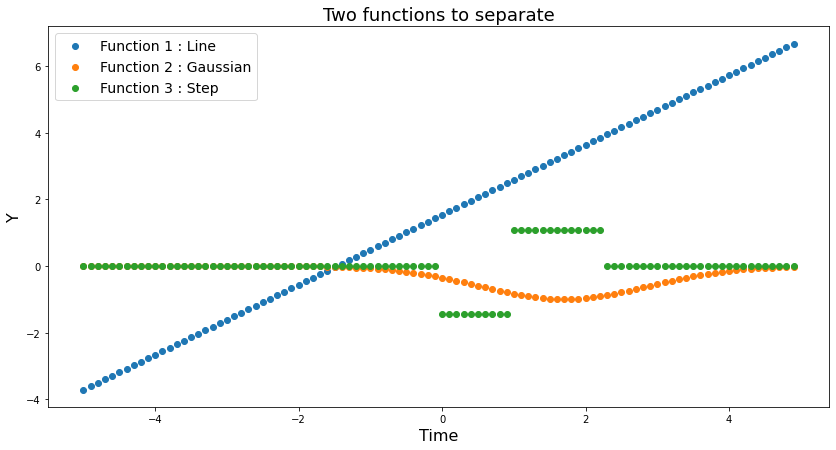

In [6]:
show = randint(0,nb_obj )

plt.figure(figsize=(14,7))

plt.scatter(x_single,y_line[show],label='Function 1 : Line')
plt.scatter(x_single,y_gauss[show],label='Function 2 : Gaussian')
plt.scatter(x_single,y_step[show],label='Function 3 : Step')


plt.title('Two functions to separate',fontsize = 18)
plt.xlabel('Time',fontsize = 16)
plt.ylabel('Y',fontsize = 16)
plt.legend(fontsize = 14)
plt.pause(1)

## Feature extraction
### Compute standard deviation and mean of each toy

In [7]:
std_gauss = np.std(y_gauss,axis=1)
mean_gauss = np.mean(y_gauss,axis=1)

std_line = np.std(y_line,axis=1)
mean_line = np.mean(y_line,axis=1)

std_step = np.std(y_step,axis=1)
mean_step = np.mean(y_step,axis=1)

### Plot the parameter space

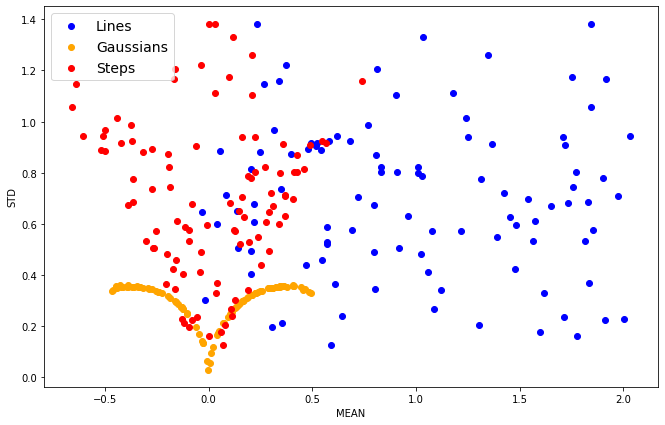

In [8]:
plt.figure(figsize=(11,7))

plt.scatter(mean_line,std_step,label = 'Lines',c='blue')
plt.scatter(mean_gauss,std_gauss,label = 'Gaussians',c='orange')
plt.scatter(mean_step,std_step,label = 'Steps',c='red')

plt.xlabel('MEAN')
plt.ylabel('STD')
plt.legend(fontsize = 14)

## Prepare the data for genetic evolution

### Choose an attractor goal value for each type of object

In [9]:
goalline= 10
goalgauss= -10
goalstep=0

labelline = ['Line']*len(std_line)
labelgauss = ['Gaussian']*len(std_gauss)
labelstep = ['Step']*len(std_step)

dic_classes = {labelline[0]:goalline, labelgauss[0]:goalgauss, labelstep[0]:goalstep}
dic_classes

{'Line': 10, 'Gaussian': -10, 'Step': 0}

### Create the data frame

In [10]:
data = pd.DataFrame(data = {'STD': list(std_line)+list(std_gauss)+list(std_step),
                            'MEAN': list(mean_line)+list(mean_gauss)+list(mean_step),
                            'TARGET': labelline+labelgauss+labelstep})


# Then split it into train and test samples
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['MEAN','STD']], data.loc[:,'TARGET'], test_size=0.30, random_state=42)

data.head()

,STD,MEAN,TARGET
0,0.871857,1.976219,Line
1,1.500092,1.718168,Line
2,1.282562,0.375554,Line
3,0.035579,0.053134,Line
4,0.122880,0.579888,Line


## Evolve towards ideal function

In [11]:
#Import evolution scripts
sys.path.append(os.path.abspath('../Scripts'))
from create_model import *

### Choose the parameters 

In [12]:
features = X_train
classes = y_train

save = 'Saves/toy_example'
population_size=1000
generations=300

### Create your function

In [13]:
model = evolve(features, classes, dic_classes, save, population_size=population_size, generations=generations)

# Print the mathematical equation of the function
sympify((str(model._program)), locals=converter)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.48          961.117        3          5.40365          7.31086      2.81m
   1     8.60          7.38823       32          5.17898          5.83293      2.54m
   2     9.10          6.81886       31          4.70781          6.33674      2.52m
   3    10.41          8.20804       14          4.34915          6.37875      2.47m
   4    12.86          6.43704       14          4.34676          5.87446      2.53m
   5    13.42          6.13805       16          4.21739          3.58585      2.76m
   6    14.53          10.0109       16          3.96191          5.88517      2.96m
   7    16.03          6.06913       23          4.01221          5.61386      2.66m
   8    16.52          5.86664       24          3.69786          5.07966  

  94    28.60          6.13282       30          2.29006          4.49589      2.58m
  95    27.29          7.59772       29          2.30515          4.20871      2.52m
  96    27.47          5.93558       28          2.36528          4.00342      2.52m
  97    27.58          10.3554       29          2.34041          4.12953      2.50m
  98    27.73          21.7785       28           2.3342          4.09862      2.50m
  99    27.68          5.66063       27          2.30353          4.46307      2.47m
 100    27.00          5.85353       27          2.35576          3.99301      2.49m
 101    26.79          5.67902       29          2.32856          4.23618      2.44m
 102    27.38          5.87423       29          2.33098          4.21439      2.45m
 103    27.23          5.27391       27          2.29994          4.49538      2.39m
 104    26.30          6.27348       29          2.29926          4.26164      2.39m
 105    27.37          5.60008       27          2.33599         

 191    26.19           5.5028       27          2.27101          4.34025      1.37m
 192    27.18           5.5727       27          2.28263          4.23567      1.37m
 193    25.96          5.33357       27           2.2397          4.62207      1.50m
 194    26.74          5.40113       27          2.26657           4.3802      1.28m
 195    26.46          5.58383       27          2.30792           4.0081      1.26m
 196    26.92          7.65079       27           2.3274          3.83272      1.24m
 197    25.92          6.04707       27          2.30998          3.98953      1.24m
 198    26.00          5.98689       27          2.28605          4.20489      1.21m
 199    26.30          10.9625       27           2.3073          4.01364      1.21m
 200    26.39          7.24536       27          2.28289          5.31304      1.21m
 201    26.56          7.17806       27          2.29934          4.08524      1.21m
 202    25.99          5.74354       27          2.29084         

 288    26.31          6.11569       27          2.25567          4.47833      9.40s
 289    26.75          8.63143       27          2.30481          4.03606      8.58s
 290    26.13          6.49416       27          2.27811          4.27634      7.46s
 291    26.68          6.23082       27          2.30194          4.06188      6.57s
 292    26.58          5.54755       28          2.28867          4.21145      6.77s
 293    26.77          7.52636       27          2.26231          4.41854      4.95s
 294    25.72          5.57096       28           2.3086          4.03209      4.32s
 295    26.68          5.42117       28          2.20479          4.96637      3.24s
 296    26.49          18.5261       27          2.32989          3.81033      2.44s
 297    26.62          5.84814       27          2.26187          4.42253      1.84s
 298    26.64          10.0248       27          2.23927           4.6259      0.80s
 299    25.86          5.52546       30          2.27279         

2.75482093663912*MEAN + 2.75482093663912*STD - 2.75482093663912*cos(2.03665987780041/STD) - 2.75482093663912*cos(MEAN + STD) - 2.75482093663912*cos(STD + sin(sin(1/sin(1/sin(STD))))) - 2.63636363636364

NB : A save of this function is created in a .pkl file

## Analyse the performance of the model

In [14]:
# Import the plotting scripts
sys.path.append(os.path.abspath('../Scripts'))
from plot import *

### Choose parameters

In [15]:
# For the dictionary, we simply reverse the previous one
dic_goals = {v: k for k, v in dic_classes.items()}

function = model
classes = y_test
features = X_test

### Scatter plots :

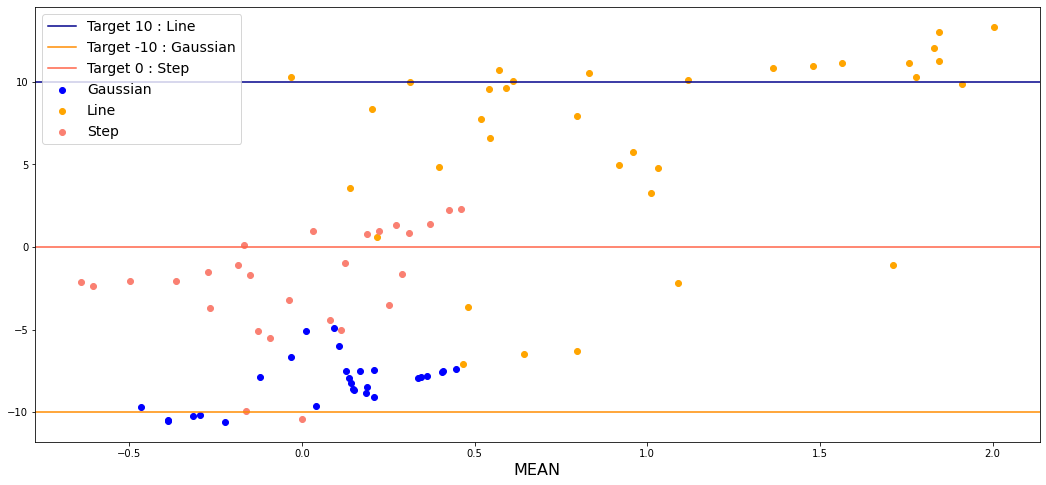

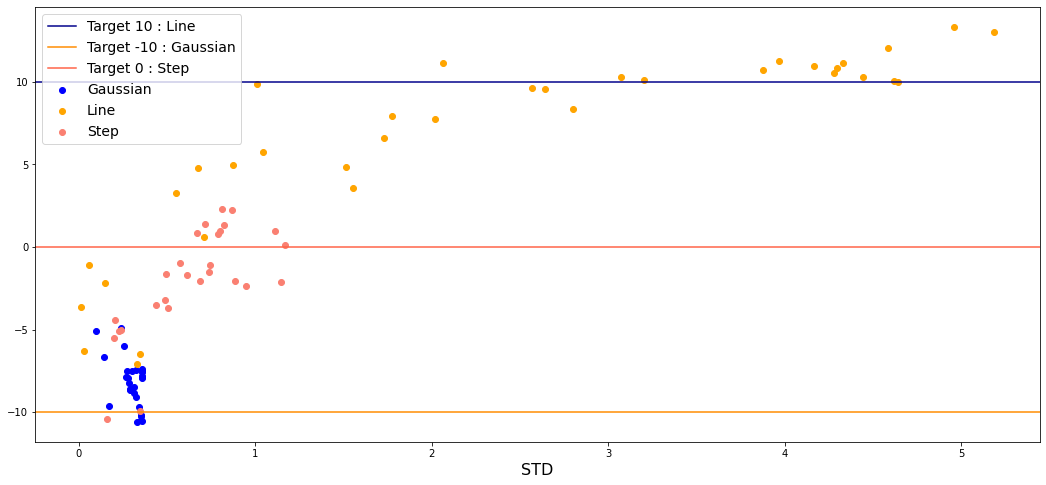

In [16]:
for i in ['MEAN','STD']:

    plt.figure(figsize=(18,8))
    plt.xlabel(i,size = 16)
    scatter_plot(function,features,i,dic_goals,classes=classes)
    plt.legend(fontsize = 14)

### Scatter plots :

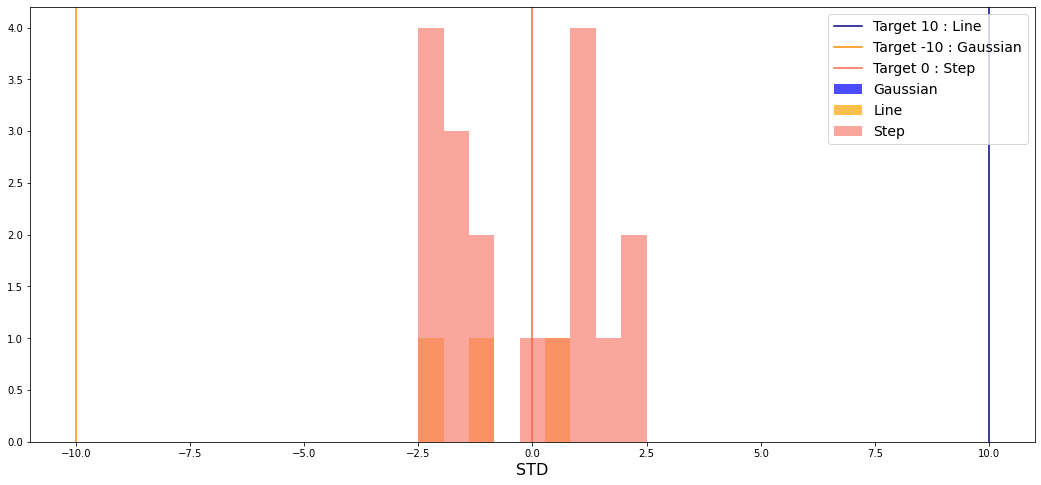

In [19]:

bins = np.linspace(-2.5,2.5,10)

plt.figure(figsize=(18,8))
plt.xlabel(i,size = 16)
histo_plot(function,features,dic_goals,bins,classes = classes, alpha = 0.7)
plt.legend(fontsize = 14)